In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = '/home/manuel/Documents/TAIL/Hackathon-OAB/data/'

In [4]:
data = pd.read_csv(url + 'covid19data.csv',index_col=0) # dados covid.saude.gov

df = data.groupby(['estado','data','municipio']).sum()

df_treat = df.xs('PB',level=0).drop(df.columns[:3],axis=1)
#df_treat.to_csv('data_treat.csv')

municipio = data[data['estado'] == 'PB'].municipio.value_counts().index

In [17]:
df_case, df_death = pd.DataFrame(),pd.DataFrame()

for i in municipio:
    df_case[i] = df_treat.xs(i,level=1)['casosAcumulado']
    df_death[i] = df_treat.xs(i,level=1)['obitosAcumulado']

df_case.T.to_csv(url + 'casos_acumulados/df_cases.csv'), df_death.T.to_csv(url + 'casos_acumulados/df_deaths.csv')

(None, None)

In [18]:
df_case_new, df_death_new = pd.DataFrame(),pd.DataFrame()
for i in municipio:
    df_case_new[i] = df_treat.xs(i,level=1)['casosNovos']
    df_death_new[i] = df_treat.xs(i,level=1)['obitosNovos']

df_case_new.T.to_csv(url + 'casos_diarios/df_cases_new.csv'), df_death.T.to_csv(url + 'casos_diarios/df_deaths_new.csv')

(None, None)

# Média movel para os casos (22 semanas)

In [11]:
df_case_new[df_case_new < 0] = 0

In [19]:
n_means_case = pd.DataFrame(columns=df_case_new.columns, index = range(int((df_case_new.shape[0] - 1)/7)))
for i in df_case_new.columns:
    k = 0
    for j in range(df_case_new.shape[0]):
        try:
            n_means_case[i][j] = np.sum(df_case_new[i][(k):(k+7)].values)/7
        except:
            break
        k += 7

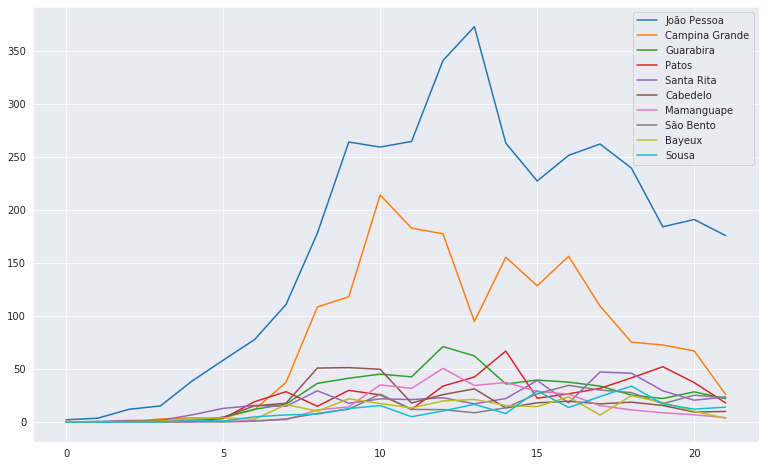

In [20]:
mun = list(n_means_case.apply(lambda x: np.sum(x),axis=0).sort_values(ascending= False)[:10].index)

sns.set_style('darkgrid')
plt.figure(figsize=(13,8))
for i in mun:
    plt.plot(n_means_case[i][:22],label=i)
    plt.legend()
    plt.grid()

In [21]:
n_means_case.T.to_csv(url + 'media_movel/week_means_case.csv')

# Média movel para os Mortos (22 semanas)

In [22]:
df_death_new[df_death_new < 0] = 0

In [23]:
n_means_death = pd.DataFrame(columns=df_death_new.columns, index = range(int((df_death_new.shape[0] - 1)/7)))
for i in df_death_new.columns:
    k = 0
    for j in range(df_death_new.shape[0]):
        try:
            n_means_death[i][j] = np.sum(df_death_new[i][(k):(k+7)].values)/7
        except:
            break
        k += 7

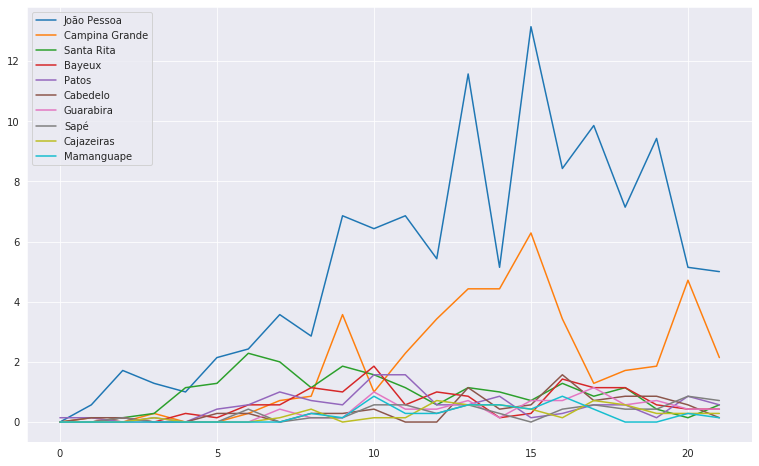

In [24]:
mun = list(n_means_death.apply(lambda x: np.sum(x),axis=0).sort_values(ascending= False)[:10].index)

sns.set_style('darkgrid')
plt.figure(figsize=(13,8))
for i in mun:
    plt.plot(n_means_death[i][:22],label=i)
    plt.legend()
    plt.grid()

In [25]:
n_means_death.T.to_csv(url + 'media_movel/week_means_death.csv')